In [90]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.color'] = 'white'
matplotlib.rcParams['axes.labelcolor'] = 'white'
matplotlib.rcParams['xtick.color'] = 'white'
matplotlib.rcParams['ytick.color'] = 'white'

import  pandas as pd

C:\Users\trevor_mcinroe\AppData\Local\Continuum\miniconda2\envs\tf\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [56]:
# Making 1000 states from 1 - 1000
state_list = [x+1 for x in range(1000)]

start_state = 500
# Termination on left (state 1) = -1
# Termination on right (state 1000) = 1

# Aggregation 
state_aggregation = {
    1: [x+1 for x in range(100)],
    2: [x+1 for x in range(100, 200)],
    3: [x+1 for x in range(200, 300)],
    4: [x+1 for x in range(300, 400)],
    5: [x+1 for x in range(400, 500)],
    6: [x+1 for x in range(500, 600)],
    7: [x+1 for x in range(600, 700)],
    8: [x+1 for x in range(700, 800)],
    9: [x+1 for x in range(800, 900)],
    10: [x+1 for x in range(900, 1000)]
}

In [57]:
def determine_agg(new_state):
    
    for k,v in state_aggregation.items():
        
        if new_state in v:
            
            return k
        
        else:
            
            continue

In [58]:
def build_feature_vector(agg_group):
    
    zeros = np.zeros(10)
    zeros[agg_group-1] = 1
    
    return zeros

In [59]:
def move_decision():
    
    # Random coinflip
    if np.random.random() > 0.5:
        
        # Move right between [1, 100] steps
        move = 'right'
        number_move = np.random.randint(1, 100)
        
        return move, number_move
    
    else:
        
        # Else, left
        move = 'left'
        number_move = np.random.randint(1, 100)
        
        return move, number_move

In [71]:
def move_action(current_state, move, number_move):
    """
    Return the state index update as well as a bool for if the agent has teminated
    """
    
    if move == 'right':
        
        new_state = current_state + number_move
        
    if move == 'left':
        
        new_state = current_state  - number_move
        
    if new_state <= 1:
        
        return 1, True
    
    if  new_state >= 1000:
        
        return 1000,  True
    
    else:
        
        return  new_state, False

In [72]:
def gen_episode(start_state):
    
    # Picking a move initially
    move, number_move = move_decision()

    # Making the move
    new_state, terminated = move_action(current_state=start_state,
                                       move=move,
                                       number_move=number_move)
    terminated = False
    
    state_trajectory = [determine_agg(start_state), determine_agg(new_state)]
    i = 0
    
    while not terminated:
        
        # Picking a move
        move, number_move = move_decision()
        
        # Making the move
        new_state, terminated = move_action(current_state=new_state,
                                           move=move,
                                           number_move=number_move)
        
        # Adding the new state  to our state trajectory
        state_trajectory.append(determine_agg(new_state))
        
    return state_trajectory

In [84]:
def gradient_mc_update(w, state_group, reward, alpha):
    
    # Generating the state vector
    sfv = build_feature_vector(state_group)
    
    w = w + alpha * (reward - np.inner(w, sfv)) * sfv
    
    return w

In [95]:
w = np.zeros(10)
a  = 2e-5
iterations = 100000
for i in range(iterations):

    state_trajectory = gen_episode(start_state=start_state)

    if state_trajectory[-1] == 10:
        reward = 1
    else:
        reward = -1

    for grp in state_trajectory:    

        w = gradient_mc_update(w=w,
                          state_group=grp,
                          reward=reward,
                          alpha=a)

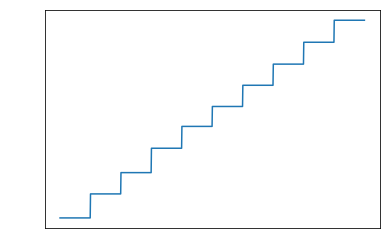

In [98]:
#  Going from group weights to state weights
final_weights = []
for weight in w:
    
    for i in range(100):
        
        final_weights.append(weight)
    
plt.plot(final_weights)